In [ ]:
import numpy as np

class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        
    def fit(self, X):
        # Initialize labels array
        self.labels_ = np.zeros(X.shape[0])
        cluster_label = 0
        
        for i in range(X.shape[0]):
            if self.labels_[i] != 0:
                continue
                
            neighbors = self.get_neighbors(X, i)
            if len(neighbors) < self.min_samples:
                self.labels_[i] = -1 # Mark as noise point
                continue
                
            cluster_label += 1
            self.labels_[i] = cluster_label
            
            # Expand cluster
            j = 0
            while j < len(neighbors):
                neighbor = neighbors[j]
                
                if self.labels_[neighbor] == -1:
                    self.labels_[neighbor] = cluster_label
                    
                elif self.labels_[neighbor] == 0:
                    self.labels_[neighbor] = cluster_label
                    new_neighbors = self.get_neighbors(X, neighbor)
                    
                    if len(new_neighbors) >= self.min_samples:
                        neighbors = np.concatenate((neighbors, new_neighbors))
                        
                j += 1
                
        return self
    
    def get_neighbors(self, X, i):
        distances = np.linalg.norm(X - X[i], axis=1)
        return np.where(distances <= self.eps)[0]


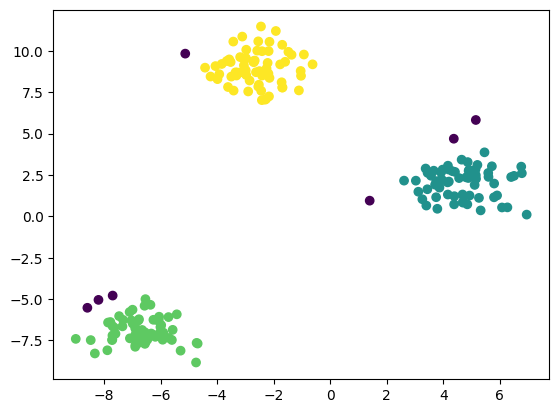

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=200, centers=3, random_state=42)

# Train the DBSCAN algorithm
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(X)

# Plot the results
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
plt.show()
